In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [101]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [102]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [103]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [104]:
df.shape

(53940, 10)

In [105]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [107]:
#the cut,color,clarity are the categorical features and rest are the numerical features and the price is the target variable

In [108]:
df.isna().sum()#there are no null values.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

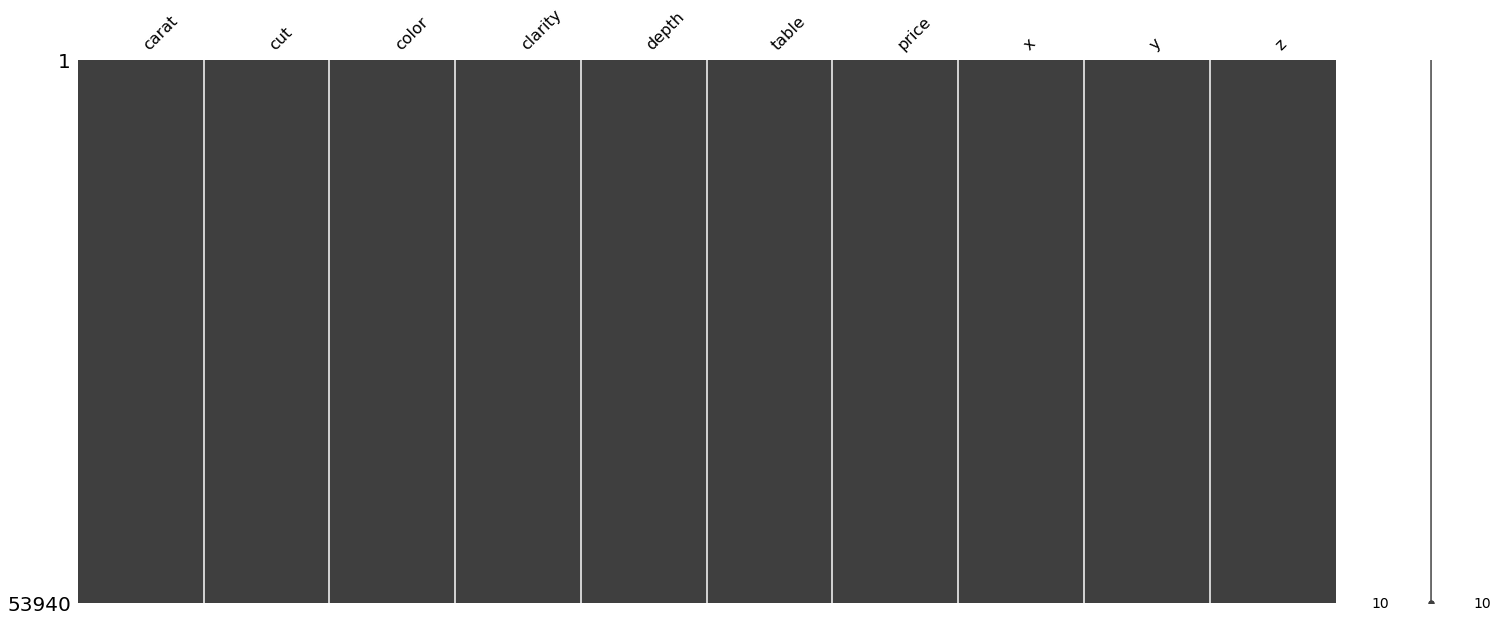

In [109]:
import missingno as msno
msno.matrix(df)

In [110]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [111]:
df.loc[(df['x']==0)|(df['y']==0)|(df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [112]:
len(df[(df['x']==0)|(df['y']==0)|(df['z']==0)])

20

In [113]:
#there are 20 rows where the values are zero for features x,y,z.
#dropping these values from the dataset.

In [114]:
df=df[(df[['x','y','z']]!=0).all(axis=1)]

In [115]:
df.shape

(53920, 10)

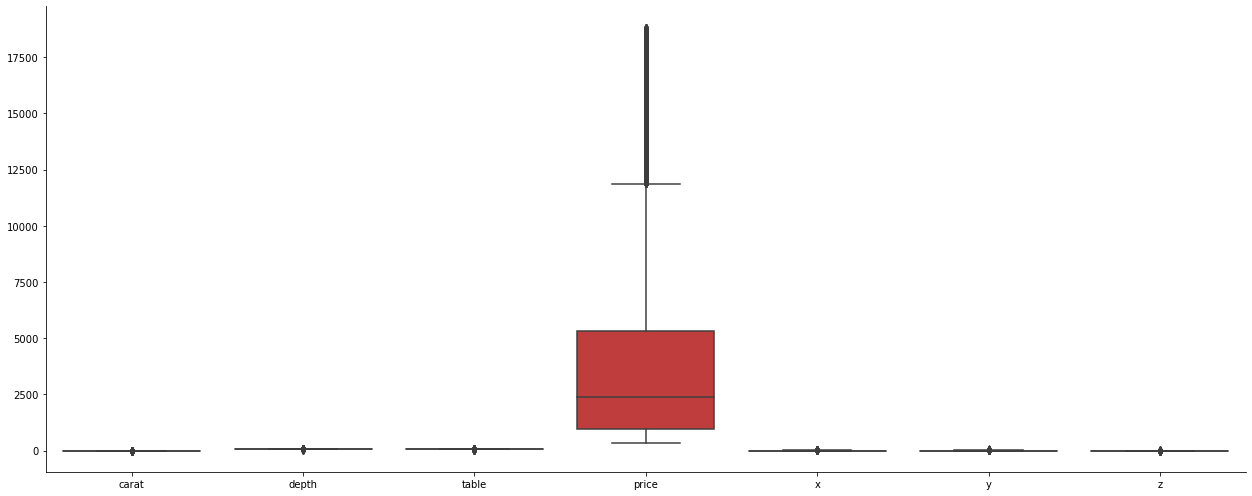

In [116]:
sns.factorplot(data=df,kind='box',size=7,aspect=2.5)

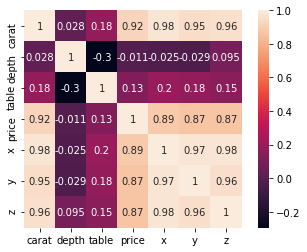

In [117]:
corr=df.corr()
sns.heatmap(data=corr,square=True,annot=True,cbar=True)

In [118]:
#the price is highly correlated to carat and the dimensions x,y,z and among it carat has the most significance.
#price is inversly realated to depth.

#carat vs price

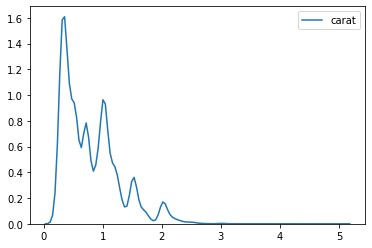

In [119]:
sns.kdeplot(df['carat'])

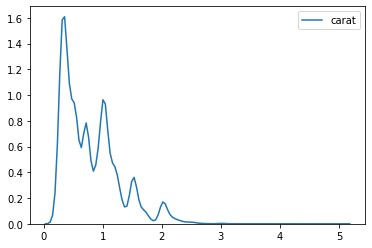

In [120]:
sns.kdeplot(df['carat'])

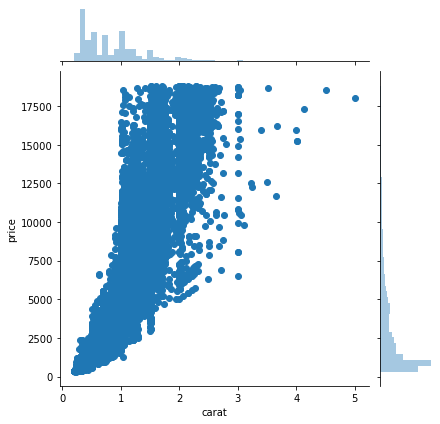

In [121]:
sns.jointplot(x='carat',y='price',data=df)

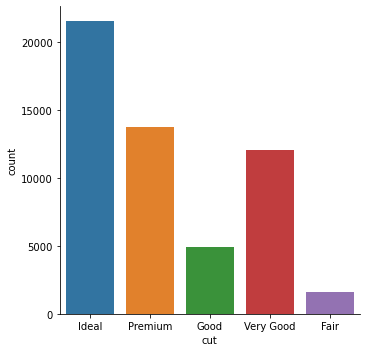

In [122]:
sns.factorplot(x='cut',data=df,kind='count')

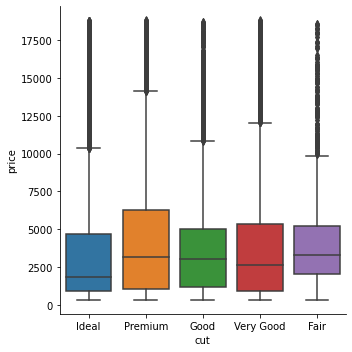

In [123]:
sns.factorplot(x='cut',y='price',data=df,kind='box')

In [124]:
#premium cut diamonds are the most expensive.

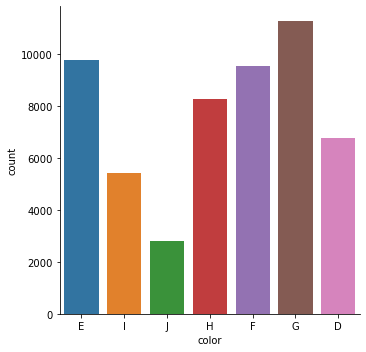

In [125]:
sns.factorplot(x='color',data=df,kind='count')

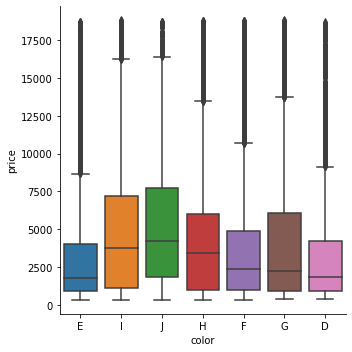

In [126]:
sns.factorplot(x='color',y='price',data=df,kind='box')

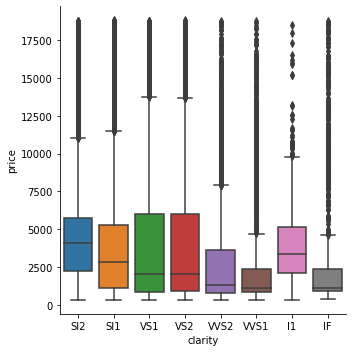

In [127]:
sns.factorplot(x='clarity',y='price',data=df,kind='box')

In [128]:
#vs1 and vs2 affect the diamonds price equally and has the highest effect on price.

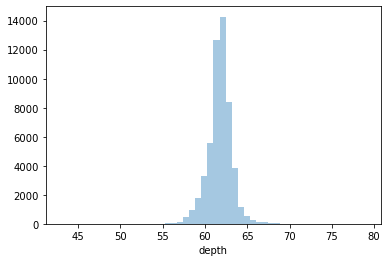

In [129]:
sns.distplot(df['depth'],kde=False)

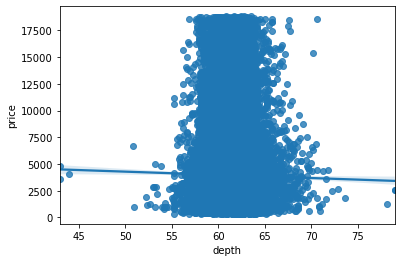

In [130]:
sns.regplot(x='depth',y='price',data=df)

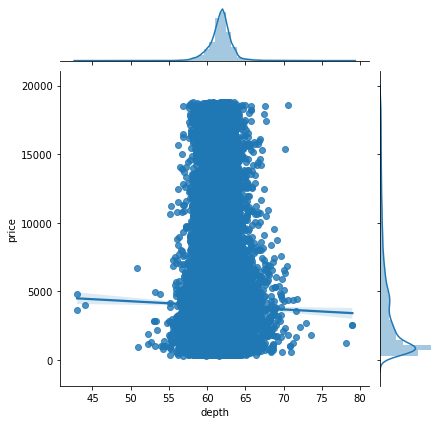

In [131]:
sns.jointplot(x='depth',y='price',data=df,kind='regplot')

In [132]:
#here we see that the price vary heavily with the same depth.

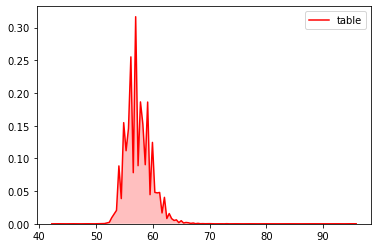

In [133]:
sns.kdeplot(df['table'],shade=True,color='red')

(2.0, 11.0)

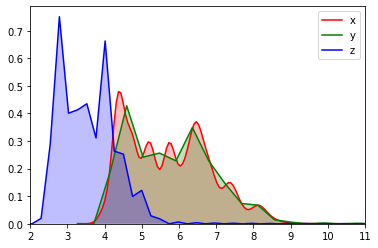

In [134]:
sns.kdeplot(df['x'],shade=True,color='r')
sns.kdeplot(df['y'],shade=True,color='g')
sns.kdeplot(df['z'],shade=True,color='b')
plt.xlim(2,11)

In [135]:
#we are gonna create a new feature from the 3 features x,y,z as they are highly correlated.

In [136]:
df['volume']=df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [137]:
df.drop(['x','y','z'],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


(array([3.5459e+04, 1.6077e+04, 2.2980e+03, 7.2000e+01, 9.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  31.707984  ,  158.67098653,  285.63398907,  412.5969916 ,
         539.55999413,  666.52299667,  793.4859992 ,  920.44900173,
        1047.41200427, 1174.3750068 , 1301.33800933, 1428.30101187,
        1555.2640144 , 1682.22701693, 1809.19001947, 1936.153022  ,
        2063.11602453, 2190.07902707, 2317.0420296 , 2444.00503213,
        2570.96803467, 2697.9310372 , 2824.89403973, 2951.85704227,
        3078.8200448 , 3205.78304733, 3332.74604987, 3459.7090524 ,
        3586.67205493, 3713.63505747, 3840.59806   ]),
 <a list of 30 Patch objects>)

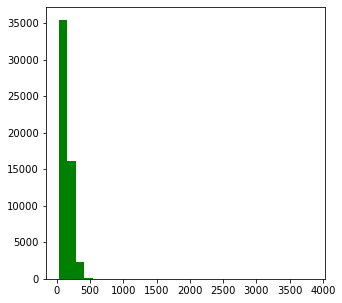

In [138]:
plt.figure(figsize=(5,5))
plt.hist(x=df['volume'],color='g',bins=30)

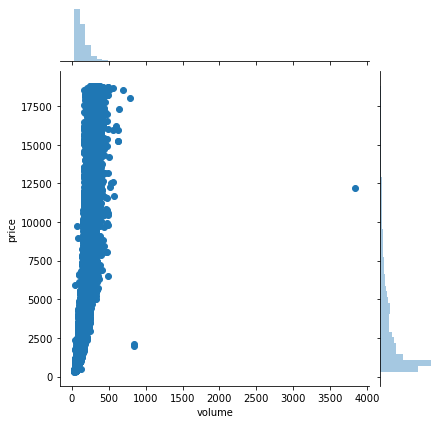

In [139]:
sns.jointplot(x='volume',y='price',data=df)

In [140]:
#here we can see that the price increase with the increase in the volume of the diamond.

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
label_cut=LabelEncoder()
label_color=LabelEncoder()
label_clarity=LabelEncoder()
df['cut']=label_cut.fit_transform(df['cut'])
df['color']=label_color.fit_transform(df['color'])
df['clarity']=label_clarity.fit_transform(df['clarity'])

In [144]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [145]:
#split the data set into train and test:

In [146]:
x=df.drop(['price'],axis=1)
y=df['price']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [155]:
#model_building:

In [157]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

In [160]:
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


In [188]:
r2_scores=[]

In [189]:
#linear regression:
lr=LinearRegression()
lr.fit(x_train,y_train)
accuracies=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=5,verbose=1)
y_pred=lr.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [190]:
print('linear regression')
print('Score:',lr.score(x_test,y_test))
print(accuracies)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('mse: ',mse)
print('mae: ',mae)
print('rmse: ',rmse)
print('r2: ', r2)

r2_scores.append(r2)


linear regression
Score: 0.867415288673075
[0.8814901  0.87761187 0.88617208 0.88112372 0.88021103]
mse:  2147105.5078174043
mae:  942.6594695166611
rmse:  1465.3004837975739
r2:  0.867415288673075


In [191]:
#lasso regression:
lar=Lasso(normalize=True)
lar.fit(x_train,y_train)
accuracies=cross_val_score(estimator=lar,X=x_train,y=y_train,cv=5,verbose=1)
y_pred=lar.predict(x_test)
print('lasso regression')
print('Score:',lar.score(x_test,y_test))
print(accuracies)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('mse: ',mse)
print('mae: ',mae)
print('rmse: ',rmse)
print('r2: ', r2)
r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


lasso regression
Score: 0.8328139091163373
[0.8686952  0.86438386 0.87363571 0.86746421 0.86826852]
mse:  2707447.736425968
mae:  926.6315421708534
rmse:  1645.4323858566684
r2:  0.8328139091163373


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [192]:
#gradientboost regression:
adr=AdaBoostRegressor(n_estimators=1000)
adr.fit(x_train,y_train)
accuracies=cross_val_score(estimator=adr,X=x_train,y=y_train,cv=5,verbose=1)
y_pred=adr.predict(x_test)
print('gradientboost regression')
print('Score:',adr.score(x_test,y_test))
print(accuracies)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('mse: ',mse)
print('mae: ',mae)
print('rmse: ',rmse)
print('r2: ', r2)
r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


gradientboost regression
Score: 0.8895091796511729
[0.88773929 0.86917492 0.88597162 0.87275476 0.8797417 ]
mse:  1789312.2559905057
mae:  1015.1640295415511
rmse:  1337.6517693295611
r2:  0.8895091796511729


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.4s finished


In [173]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
gbr.fit(x_train , y_train)
accuracies=cross_val_score(estimator=gbr,X=x_train,y=y_train,cv=5,verbose=1)
y_pred=gbr.predict(x_test)
print('gradientboost regression')
print('Score:',gbr.score(x_test,y_test))
print(accuracies)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('mse: ',mse)
print('mae: ',mae)
print('rmse: ',rmse)
print('r2: ', r2)
r2_scores=[]
r2_scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    13987928.0409            1.77s
         2    12410382.1772            1.67s
         3    11086322.5150            1.63s
         4     9921699.4114            1.57s
         5     8950962.3009            1.56s
         6     8086850.3625            1.54s
         7     7355431.5484            1.52s
         8     6726076.8389            1.50s
         9     6170171.8773            1.49s
        10     5701496.8668            1.47s
        20     3181711.4179            1.28s
        30     2376116.4624            1.11s
        40     2084967.5713            0.94s
        50     1905444.1004            0.79s
        60     1770326.7340            0.63s
        70     1667172.8686            0.47s
        80     1587919.3643            0.31s
        90     1526198.7356            0.16s
       100     1477521.8540            0.00s
      Iter       Train Loss   Remaining Time 
         1    14076020.3611            1.38s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        20     3185871.6996            1.04s
        30     2378558.9212            0.90s
        40     2087280.2857            0.77s
        50     1907967.0535            0.64s
        60     1773321.8817            0.51s
        70     1671363.2834            0.38s
        80     1592693.4100            0.26s
        90     1531407.0126            0.13s
       100     1483481.9657            0.00s
      Iter       Train Loss   Remaining Time 
         1    13920933.0279            1.35s
         2    12340989.3991            1.31s
         3    11028281.5916            1.29s
         4     9856844.5725            1.26s
         5     8892585.4161            1.25s
         6     8045360.5735            1.24s
         7     7299043.6964            1.22s
         8     6671683.7118            1.21s
         9     6118184.9478            1.20s
        10     5650888.5159            1.19s
        20     3144066.9561            1.03s
        30     2344385.1324            0.89s
        4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.4s finished


In [193]:
#randomforest regression:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
accuracies=cross_val_score(estimator=rfr,X=x_train,y=y_train,cv=5,verbose=1)
y_pred=rfr.predict(x_test)
print('randomforest regression')
print('Score:',rfr.score(x_test,y_test))
print(accuracies)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('mse: ',mse)
print('mae: ',mae)
print('rmse: ',rmse)
print('r2: ', r2)
r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.6s finished


randomforest regression
Score: 0.983269382092389
[0.97984049 0.98053224 0.97956362 0.98001627 0.979237  ]
mse:  270939.2470602691
mae:  271.66604629992037
rmse:  520.5182485372335
r2:  0.983269382092389


In [194]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
rfr=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
rfr.fit(x_train,y_train)
print('Score :' , clf_rf.score(x_test, y_test))
pred=clf_rf.predict(x_test)
r2 = r2_score(y_test, pred)
print('R2 :' ,r2)
r2_scores.append(r2)


Score : 0.9832507897267052
R2 : 0.9832507897267052


In [195]:
#kneighboursregressor.
knr=KNeighborsRegressor()
knr.fit(x_train , y_train)
accuracies = cross_val_score(estimator = knr, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = knr.predict(x_test)
print('kneighbours regression')
print('Score:',rfr.score(x_test,y_test))
print(accuracies)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('mse: ',mse)
print('mae: ',mae)
print('rmse: ',rmse)
print('r2: ', r2)
r2_scores.append(r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


kneighbours regression
Score: 0.9832183309975518
[0.95588682 0.95637998 0.9565321  0.9558216  0.95427415]
mse:  718010.3048145401
mae:  432.74473293768546
rmse:  847.3548871721576
r2:  0.9556625472539708


In [196]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
knr=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
knr.fit(x_train,y_train)
print('Score :' , knr.score(x_test, y_test))
pred=knr.predict(x_test)
r2 = r2_score(y_test, pred)
print('R2 :' ,r2)
r2_scores.append(r2)


Score : 0.9556625472539708
R2 : 0.9556625472539708


In [197]:
r2_scores

[0.867415288673075,
 0.8328139091163373,
 0.8895091796511729,
 0.983269382092389,
 0.9832507897267052,
 0.9556625472539708,
 0.9556625472539708]

In [198]:
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [203]:
algos=pd.DataFrame({'Algorithms':models,"R2-scores":r2_scores})
algos.sort_values(by='R2-scores',ascending=False)

,Algorithms,R2-scores
3,Ridge Regression,0.983269
4,GradientBoosting Regression,0.983251
5,RandomForest Regression,0.955663
6,KNeighbours Regression,0.955663
2,AdaBoost Regression,0.889509
0,Linear Regression,0.867415
1,Lasso Regression,0.832814


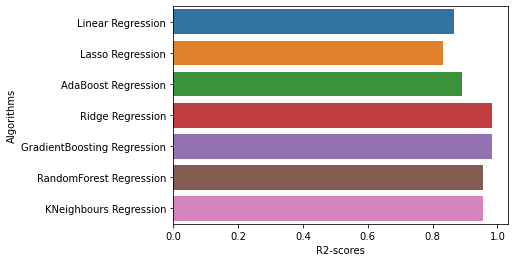

In [205]:
sns.barplot(x='R2-scores',y="Algorithms",data=algos)

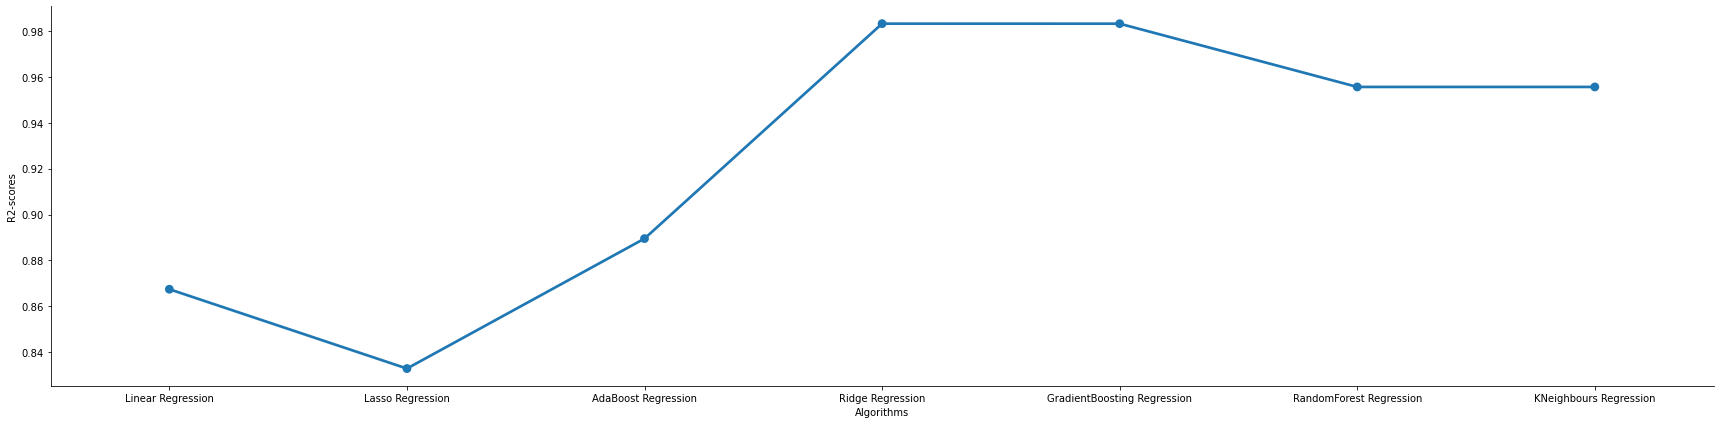

In [207]:
sns.factorplot(x='Algorithms',y='R2-scores',data=algos,size=6,aspect=4)

In [ ]:
#ridge regressor gave the highest score.